In [56]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
%matplotlib inline 

In [57]:
#display images side by side
def plotImageSet(image_list,color='gnuplot2'):
    fig = plt.figure()
    count = 1
    for image in image_list:
        ax = fig.add_subplot(1,len(image_list),count)
        imgplot = plt.imshow(image,cmap=color)
        ax.axis('off')
        count = count +1
    plt.show()

In [58]:
# finding corners

# prepare object points
nx = 9 # number of inside corners in x
ny = 6 # number of inside corners in y

objpoints = [] # 3D points in real world space
imgpoints = [] # 2D points in image plane
imglist=[]
#prepare object points
objp = np.zeros([ny*nx,3],np.float32)
objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2) # x, y coordinates of corner points

# Read in and make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')
#fname = './camera_cal/calibration1.jpg'
success = 0
failure = 0
for fname in images:
    
    # If you are reading in an image using mpimg.imread() this will read in an RGB image
    # and you should convert to grayscale using cv2.COLOR_RGB2GRAY, but if you are using
    # cv2.imread() or the glob API, this will read in a BGR image and you should convert 
    # to grayscale using cv2.COLOR_BGR2GRAY.
    
    # read image and convert to grayscale
    img = mpimg.imread(fname)                    #img = cv2.imread(fname) # read with opencv lib
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  
    
    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

    # If found, draw corners
    if ret == True:
        imgpoints.append(corners)
        objpoints.append(objp)
        # Draw and display the corners
        cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
        imglist.append(img)
        success = success+1
    else:
        failure = failure+1
        print('No corners found!')

print('No corners found in ',failure,' out of ',failure+success,' images')



No corners found!
No corners found!
No corners found!
No corners found in  3  out of  20  images


NameError: name 'imagelist' is not defined

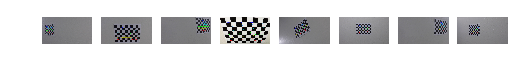

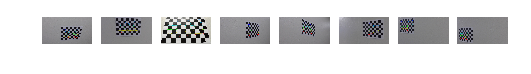

In [60]:
#plot successful images
plotImageSet(imglist[0:8])
plotImageSet(imglist[9:])

In [53]:
#calibrate the camera
# Camera calibration, given object points, image points, and the shape of the grayscale image:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)

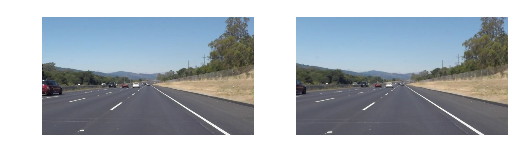

In [61]:
# load a test image and undistort it
fname = 'test_images/solidWhiteRight.jpg'
img = mpimg.imread(fname)
dst = cv2.undistort(img, mtx, dist, None, mtx)

# display original and undistorted
plotImageSet([img,dst])

In [ ]:
# Note gray.shape[::-1]. This returns the image height and width in pixel values like (960, 1280).
# Another way to retrieve the image shape, is to get them directly from the color image by retrieving 
# the first two values in the color image shape array using img.shape[0:2]
# You'll get an error if you use a color image as it contains a third value which is the number of channels (eg.3)
